In [8]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as mtick

In [9]:
df1=pd.read_excel('TRD_Mnth.xlsx',encoding='gbk')
df2=pd.read_csv('TRD_Co.csv' ,usecols=['permno','siccd'],encoding='gbk')
df=pd.merge(df1,df2,on=['permno'])
# change date format
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['siccd'] = [x[0:1] for x in df['siccd']]
# to store data
data=pd.DataFrame(index=list(range(1,277)),columns=['SH_num',\
                  'SZ_num','total_num','A_num','B_num',\
                  'C_num','D_num','E_num','F_num','G_num',\
                  'H_num','I_num','J_num','K_num','L_num',\
                  'M_num','SH_m','SZ_m','total_m','A_m',\
                  'B_m','C_m','D_m','E_m','F_m',\
                  'G_m','H_m','I_m','J_m','K_m','L_m',\
                  'M_m','cer','cler'])

In [10]:
# compute number of stocks
i=1
for year in range(1997,2020):    
    for month in range(1,13):
        data['SH_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['exchcd']==1)|(df['exchcd']==32))])
        data['SZ_num'][i]=len(df[(df['year']==year)&(df['month']==month)&((df['exchcd']==4)|(df['exchcd']==16))])
        data['total_num'][i]=len(df[(df['year']==year)&(df['month']==month)])
        data['A_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='A')])
        data['B_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='B')])
        data['C_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='C')])
        data['D_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='D')])
        data['E_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='E')])
        data['F_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='F')])
        data['G_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='G')])
        data['H_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='H')])
        data['I_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='I')])
        data['J_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='J')])
        data['K_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='K')])
        data['L_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='L')])
        data['M_num'][i]=len(df[(df['year']==year)&(df['month']==month)&(df['siccd']=='M')])
        i=i+1

In [11]:
# compute total market value
df_m=df.dropna(axis=0, subset=['me'])
i=1
for year in range(1997,2020):    
    for month in range(1,13):
        data['SH_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df['exchcd']==1)|(df['exchcd']==32))]['me'])        
        data['SZ_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&((df['exchcd']==4)|(df['exchcd']==16))]['me'])
        data['total_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)]['me'])
        data['A_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='A')]['me'])
        data['B_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='B')]['me'])
        data['C_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='C')]['me'])
        data['D_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='D')]['me'])
        data['E_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='E')]['me'])
        data['F_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='F')]['me'])
        data['G_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='G')]['me'])
        data['H_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='H')]['me'])
        data['I_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='I')]['me'])
        data['J_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='J')]['me'])
        data['K_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='K')]['me'])
        data['L_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='L')]['me'])
        data['M_m'][i]=sum(df_m[(df_m['year']==year)&(df_m['month']==month)&(df_m['siccd']=='M')]['me'])
        i=i+1

In [12]:
# import risk-free security return data
rf=pd.read_csv('TRD_Nrrate.csv' ,usecols=['date','rf'],encoding='gbk')
rf['date']=pd.to_datetime(rf['date'])
rf['year']=rf['date'].dt.year
rf['month']=rf['date'].dt.month
rf=rf.drop(['date'],axis=1)
rf.drop_duplicates(subset=['year','month'],keep='last',inplace=True)

df_r=df.dropna(axis=0, subset=['ret'])
df_r['ret']=df_r['ret']*100
# merge and calculate the excess return
df_r=pd.merge(df_r,rf,on=['year','month'])
df_r['ret_rf']=df_r['ret']-df_r['rf']

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
# compute mkt factor
mkt=[]
for year in range(1997,2020):    
    for month in range(1,13):
        temp=df_r[(df_r['year']==year)&(df_r['month']==month)]
        temp['me_weight']=temp['me']/sum(temp['me'])
        mkt.append(sum(temp['me_weight']*temp['ret_rf']))

print(np.mean(mkt),np.std(mkt))
# compute compounded excess return and cumulative log excess return
mkt=[x/100+1 for x in mkt]
temp1=1
temp2=1
i=1
for x in mkt:
    temp1=temp1*x
    temp2=np.log(temp1)
    data['cer'][i]=temp1
    data['cler'][i]=temp2
    i=i+1

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.7690998310500858 8.342352879891356


In [14]:
def result(df,columnsame): 
    name=['Mean','SD','Skew','Kurt','Min','5%','25%','Median','75%','95%','Max','n']
    result=pd.DataFrame(index=list(range(1,277)),columns=name)
    i=0;
    for year in range(1997,2020):    
        for month in range(1,13):
            temp=df[(df['year']==year)&(df['month']==month)][columnsame]
            result.iloc[i,0]=temp.mean()
            result.iloc[i,1]=temp.std()
            result.iloc[i,2]=temp.skew()
            result.iloc[i,3]=temp.kurt()
            result.iloc[i,4]=temp.min()
            result.iloc[i,5]=temp.quantile(0.05)
            result.iloc[i,6]=temp.quantile(0.25)
            result.iloc[i,7]=temp.quantile(0.50)
            result.iloc[i,8]=temp.quantile(0.75)
            result.iloc[i,9]=temp.quantile(0.95)
            result.iloc[i,10]=temp.max()
            result.iloc[i,11]=len(temp)
            i=i+1
    return result

In [15]:
# print Table7.3
result1=result(df_r,'ret')
result2=result(df_r,'ret_rf')
name=['Mean','SD','Skew','Kurt','Min','5%','25%','Median','75%','95%','Max','n']
results=pd.DataFrame(index=['ret','RET'],columns=name)
for i in range(12):
    results.iloc[0,i]=result2.iloc[:,i].mean()
    results.iloc[1,i]=result1.iloc[:,i].mean()
print(results)

        Mean       SD     Skew     Kurt      Min       5%      25%     Median  \
ret  1.40189  11.9992  3.91508  88.9974 -36.9666 -12.3428 -4.96449 -0.0523089   
RET  1.62409  11.9992  3.91508  88.9974 -36.7444 -12.1206 -4.74229   0.169891   

         75%      95%      Max        n  
ret  6.00742  19.2042  177.557  1806.41  
RET  6.22962  19.4264   177.78  1806.41  


In [16]:
# make datetime index
x=[]
for year in range(1997,2020):
    for month in range(1,13):
            x.append(str(year)+'-'+str(month))
data.index=pd.to_datetime(x)

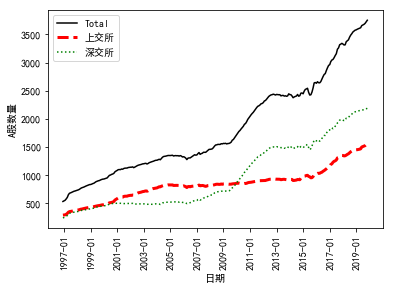

In [17]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
# plot Figure7.1
plt.figure()
plt.plot(data['total_num'], c='k', ls='-',label='Total')
plt.plot(data['SH_num'], c='r', ls='--', lw=3,label='上交所')
plt.plot(data['SZ_num'], c='g', ls=':',label='深交所')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)  
plt.xlabel('日期')
plt.ylabel('A股数量')
plt.legend()
plt.show()

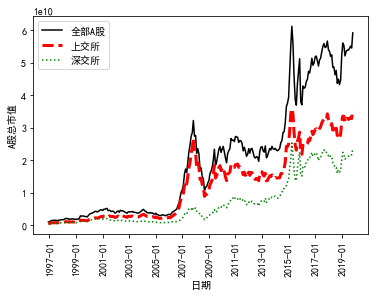

In [18]:
# plot Figure7.2
plt.figure()
plt.plot(data['total_m'], c='k', ls='-',label='全部A股')
plt.plot(data['SH_m'], c='r', ls='--', lw=3,label='上交所')
plt.plot(data['SZ_m'], c='g', ls=':',label='深交所')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)   
plt.xlabel('日期')
plt.ylabel('A股总市值')
plt.legend()
plt.show()

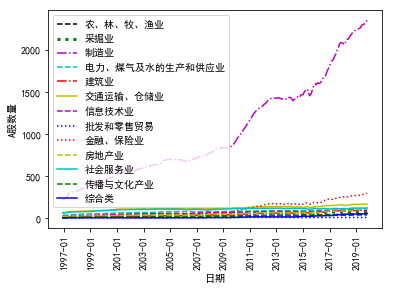

In [19]:
# plot Figure7.2
plt.figure()
plt.plot(data['A_num'], c='k', ls='--',label='农、林、牧、渔业')
plt.plot(data['B_num'], c='g', ls=':', lw=3,label='采掘业')
plt.plot(data['C_num'], c='m', ls='-.',label='制造业')
plt.plot(data['D_num'], c='c', ls='--',label='电力、煤气及水的生产和供应业')
plt.plot(data['E_num'], c='r', ls='-.',label='建筑业')
plt.plot(data['F_num'], c='y', ls='-',label='交通运输、仓储业')
plt.plot(data['G_num'], c='m', ls='--',label='信息技术业')
plt.plot(data['H_num'], c='b', ls=':',label='批发和零售贸易')
plt.plot(data['I_num'], c='r', ls=':',label='金融、保险业')
plt.plot(data['J_num'], c='y', ls='--',label='房地产业')
plt.plot(data['K_num'], c='c', ls='-',label='社会服务业')
plt.plot(data['L_num'], c='g', ls='--',label='传播与文化产业')
plt.plot(data['M_num'], c='b', ls='-',label='综合类')

ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)  
plt.xlabel('日期')
plt.ylabel('A股数量')
plt.legend()
plt.show()

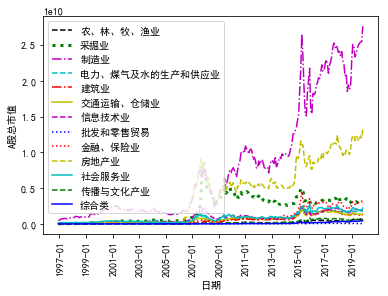

In [20]:
# plot Figure7.4
plt.figure()
plt.plot(data['A_m'], c='k', ls='--',label='农、林、牧、渔业')
plt.plot(data['B_m'], c='g', ls=':', lw=3,label='采掘业')
plt.plot(data['C_m'], c='m', ls='-.',label='制造业')
plt.plot(data['D_m'], c='c', ls='--',label='电力、煤气及水的生产和供应业')
plt.plot(data['E_m'], c='r', ls='-.',label='建筑业')
plt.plot(data['F_m'], c='y', ls='-',label='交通运输、仓储业')
plt.plot(data['G_m'], c='m', ls='--',label='信息技术业')
plt.plot(data['H_m'], c='b', ls=':',label='批发和零售贸易')
plt.plot(data['I_m'], c='r', ls=':',label='金融、保险业')
plt.plot(data['J_m'], c='y', ls='--',label='房地产业')
plt.plot(data['K_m'], c='c', ls='-',label='社会服务业')
plt.plot(data['L_m'], c='g', ls='--',label='传播与文化产业')
plt.plot(data['M_m'], c='b', ls='-',label='综合类')
ax1 = plt.gca()
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
plt.xticks(rotation=90)   
plt.xlabel('日期')
plt.ylabel('A股总市值')
plt.legend()
plt.show()

Text(0,0.5,'累积MKT')

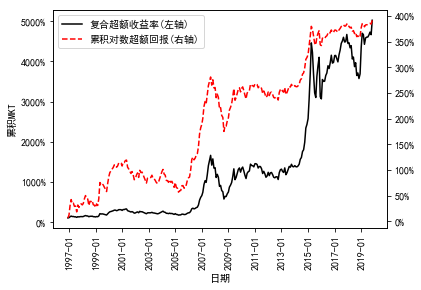

In [21]:
# plot Figure7.5
fig = plt.figure()
ax1 = fig.add_subplot(111)
lns1=ax1.plot(data['cer']*100, '-k', label = '复合超额收益率(左轴)')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
lns2= ax2.plot(data['cler']*100, '--r', label = '累积对数超额回报(右轴)')
lns = lns1+lns2
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
plt.xticks(pd.date_range(data.index[0],data.index[-1],freq='24M'))#时间间隔
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
fmt='%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
ax2.yaxis.set_major_formatter(yticks)
ax1.set_xlabel('日期')
ax1.set_ylabel('累积MKT')